In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [2]:
ending = "Sept19"

In [3]:
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_angle_MC_ONLY_weighted_recoCut_incErr_noTune_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(20):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

nuWro_events = events

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_angle_MC_ONLY_weighted_recoCut_incErr_noTune_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(400):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+20] for x in range(0, len(AC), 20)]

print("AC")
print(chunks)
nuWro_Ac = chunks
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(20):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

prior_true_nuWro = prior_true

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_angle_MC_ONLY_weighted_recoCut_incErr_noTune_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(20):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

nuWro_errs = errs

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_angle_MC_ONLY_weighted_recoCut_incErr_noTune_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(400):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+20] for x in range(0, len(cov), 20)]

print("cov")
print(chunks_cov)
print("")

Unsmeared events
[29.863, 24.4018, 21.1813, 39.5353, 40.1893, 62.3521, 67.8112, 100.209, 172.397, 408.377, 584.589, 688.179, 690.886, 816.63, 1016.78, 1130.54, 1561.84, 2133.82, 3419.86, 7507.81]

AC
[[0.608062, -0.0156384, 0.0552507, 0.0760703, -0.0069103, 0.0260161, 0.0208876, 0.0314684, 0.0356791, -0.00253607, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.0156384, 0.157433, -0.110964, 0.0131695, 0.0538587, 0.0650493, 0.0565688, 0.0860214, 0.0919219, -0.0328309, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0552507, -0.110964, 0.763117, 0.0133194, -0.0182046, -0.0194626, 0.00130172, -0.0042577, -0.00239463, 0.000204864, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0760703, 0.0131695, 0.0133194, 0.858202, -0.130801, 0.00572658, 0.0355177, 0.0371919, 0.0442065, -0.0126388, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.0069103, 0.0538587, -0.0182046, -0.130801, 0.294657, -0.0597996, 0.122159, 0.111617, 0.1286, -0.0258403, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [4]:
with open('../blockwise/stv-analysis-new/blocks.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n', '20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n']


In [5]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[   36.8937556     27.87730353    24.80288157    45.79861535
    48.53877483    70.39245885    82.23329291   119.70866296
   213.35496167   536.45606941   664.65128291   748.2735759
   792.96975249   968.58428806  1125.68818533  1385.09110832
  1870.84204993  2601.57197794  4268.66396625 10640.72418075]


Unfolding Done with MC Data Signal: 
[29.863, 24.4018, 21.1813, 39.5353, 40.1893, 62.3521, 67.8112, 100.209, 172.397, 408.377, 584.589, 688.179, 690.886, 816.63, 1016.78, 1130.54, 1561.84, 2133.82, 3419.86, 7507.81]


Difference
[   7.0307556     3.47550353    3.62158157    6.26331535    8.34947483
    8.04035885   14.42209291   19.49966296   40.95796167  128.07906941
   80.06228291   60.0945759   102.08375249  151.95428806  108.90818533
  254.55110832  309.00204993  467.75197794  848.80396625 3132.91418075]

[19.05676309 12.46714383 14.6014549  13.67577449 17.20165963 11.4221878
 17.53802188 16.28926636 19.19709828 23.87503408 12.04575767  8.03109689
 12.8735998  1

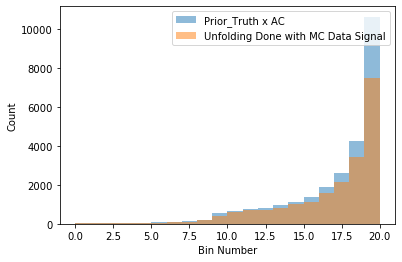

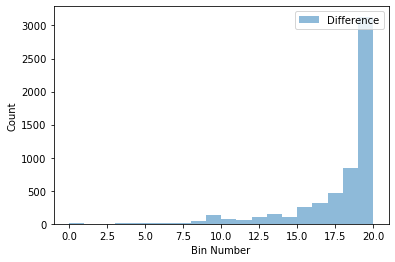

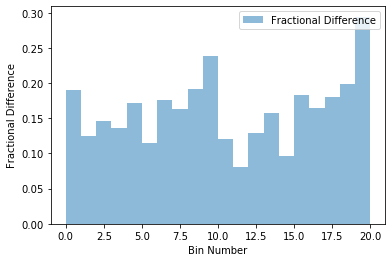

In [6]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

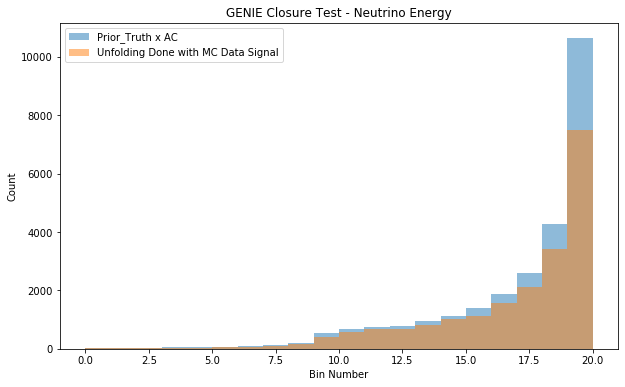

In [7]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("noTune_fakeData_closure_test_angle_"+ending+".svg",bbox_inches='tight' )


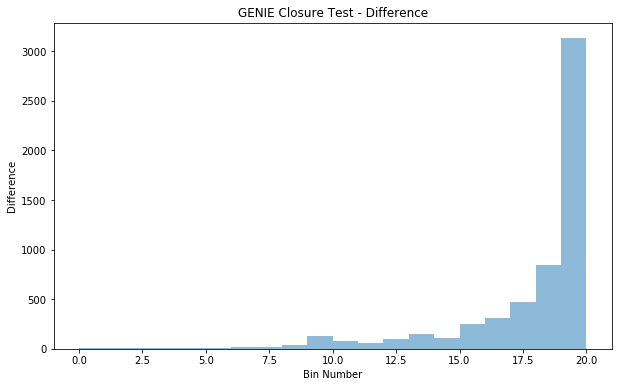

In [8]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("noTune_fakeData_closure_test_diff_angle_"+ending+".svg",bbox_inches='tight' )

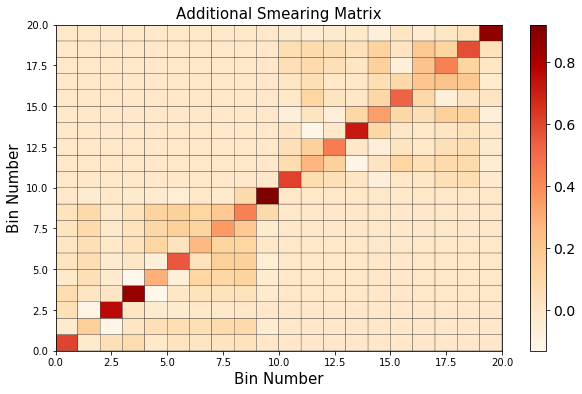

In [9]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("noTune_fakeData_closure_test_Ac_angle_"+ending+".svg",bbox_inches='tight' )

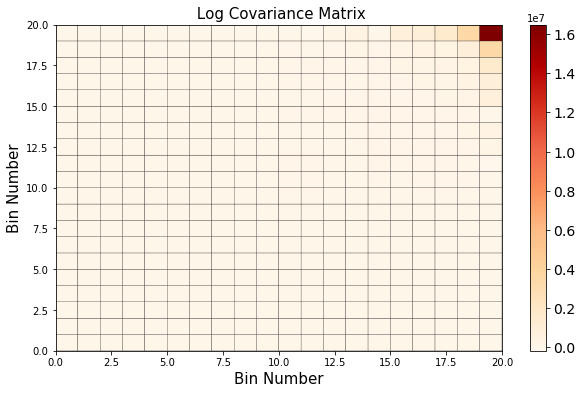

In [10]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
    
plt.pcolor(bins, bins, (chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

In [11]:
np.savetxt("data_covmat_MC_noTune_chi2_angleDiff_comb_"+ending+".csv", 
           chunks_cov,
           delimiter =", ", 
           fmt ='% s')

print(ending)
print(chunks_cov)

Sept19
[[362.782, 1.0023, 115.079, 129.559, 23.5971, 73.6388, 83.6583, 121.222, 219.64, 549.499, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0023, 50.7477, -101.939, 63.9509, 27.6503, 79.4248, 44.3407, 73.9516, 65.0849, -115.248, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [115.079, -101.939, 681.997, -88.5667, 26.2028, 14.5477, 31.2689, 41.6945, 68.7772, 132.338, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [129.559, 63.9509, -88.5667, 770.347, -103.499, 132.01, 88.3555, 139.087, 179.91, 145.015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [23.5971, 27.6503, 26.2028, -103.499, 101.134, 32.703, 86.763, 112.127, 197.797, 468.741, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [73.6388, 79.4248, 14.5477, 132.01, 32.703, 277.69, 98.5256, 195.091, 186.738, -184.92, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [83.6583, 44.3407, 31.2689, 88.3555, 86.763, 98.5256, 148.271, 201.79, 386.468, 1055.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [12

## Convert to xsec units - uneeded right now

###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

nue_events = np.array(events[0:10])
numu_events = np.array(events[10:20])

nue_errs = np.array(errs[0:10])
numu_errs = np.array(errs[10:20])

#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:10]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:10]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[10:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[10:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 1E-39)
nue_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nuWro_xsec_nue_events = xsec_nue_events
nuWro_xsec_nue_errs = xsec_nue_errs
nuWro_lower_err = lower_err

nue_fig.savefig("unfolded_nuWro_fakeData_MC_nue_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 4E-40)
numu_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Numu cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nuWro_xsec_numu_events = xsec_numu_events
nuWro_xsec_numu_errs = xsec_numu_errs
nuWro_lower_err_numu = lower_err

numu_fig.savefig("unfolded_nuWro_fakeData_MC_numu_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

bins = np.arange(-1.0, 1.2, 0.2)
count = np.arange(-0.95, 1.05, 0.2)
#print(count)

plt.ylim(0, 5)
plt.xlabel("cos(Lepton Angle)")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()

import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)
#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

plt.ylim(0, 6)
ratio_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nuWro_xsec_ratio_events = xsec_ratio_events
nuWro_xsec_ratio_errs = xsec_ratio_errs
nuWro_lower_err_ratio = lower_err

ratio_fig.savefig("unfolded_nuWro_fakeData_MC_ratio_angle_"+ending+".svg",bbox_inches='tight' )

## Now do the same with RUN1 genie unfolding - unneeded

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(20):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

genie_events = events

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(400):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+20] for x in range(0, len(AC), 20)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(20):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(20):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

genie_errors = errs

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(400):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+20] for x in range(0, len(cov), 20)]

print("cov")
print(chunks_cov)
print("")


made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Convert to xsec units

###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

nue_events = np.array(events[0:10])
numu_events = np.array(events[10:20])

nue_errs = np.array(errs[0:10])
numu_errs = np.array(errs[10:20])

#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:10]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:10]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[10:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[10:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 1E-39)
nue_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

genie_xsec_nue_events = xsec_nue_events
genie_xsec_nue_errs = xsec_nue_errs
genie_lower_err = lower_err

nue_fig.savefig("unfolded_run1_MC_nue_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 4E-40)
numu_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Numu cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

genie_xsec_numu_events = xsec_numu_events
genie_xsec_numu_errs = xsec_numu_errs
genie_lower_err_numu = lower_err

numu_fig.savefig("unfolded_run1_MC_numu_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

bins = np.arange(-1.0, 1.2, 0.2)
count = np.arange(-0.95, 1.05, 0.2)
#print(count)

plt.ylim(0, 5)
plt.xlabel("cos(Lepton Angle)")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()

import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)
#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

plt.ylim(0, 6)
ratio_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

genie_xsec_ratio_events = xsec_ratio_events
genie_xsec_ratio_errs = xsec_ratio_errs
genie_lower_err_ratio = lower_err

ratio_fig.savefig("unfolded_run1_MC_ratio_angle_"+ending+".svg",bbox_inches='tight' )

## Now Compare

The genie unfolded spectra should be within the uncertainties of the nuWro unfolded spectra

###############
###NUE######
#############

errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

#print(bincenters)
sel = errors_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_xsec_nue_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = errors_ax1.bar(bincenters, nuWro_xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(nuWro_lower_err))

#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_xsec_nue_events, label='genie')

errors = errors_ax1.bar(bincenters, genie_xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(genie_lower_err))


errors_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Unfolded Comparison")
leg = errors_ax1.legend()

errors_ax1.set_ylim([0, 8e-40])

for i in np.arange(len(genie_xsec_nue_events)):
    if ((genie_xsec_nue_events[i] < nuWro_xsec_nue_events[i] + nuWro_xsec_nue_errs[i]) and (genie_xsec_nue_events[i] > nuWro_xsec_nue_events[i] - nuWro_xsec_nue_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", genie_xsec_nue_events[i])
        print("top of err = ", nuWro_xsec_nue_events[i] + nuWro_xsec_nue_errs[i])
        print("bot of err = ", nuWro_xsec_nue_events[i] - nuWro_xsec_nue_errs[i])
        print("")

for i in np.arange(len(nuWro_xsec_nue_events)):
    if ((nuWro_xsec_nue_events[i] < genie_xsec_nue_events[i] + genie_xsec_nue_errs[i]) and (nuWro_xsec_nue_events[i] > genie_xsec_nue_events[i] - genie_xsec_nue_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", nuWro_xsec_nue_events[i])
        print("top of err = ", genie_xsec_nue_events[i] + genie_xsec_nue_errs[i])
        print("bot of err = ", genie_xsec_nue_events[i] - genie_xsec_nue_errs[i])
        print("")

diff = 7.723562394053671e-41 - 7.480422350351412e-41

fractional_diff = diff/7.480422350351412e-41

print(fractional_diff)

###############
###NUMU######
#############

errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

#print(bincenters)
sel = errors_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_xsec_numu_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = errors_ax1.bar(bincenters, nuWro_xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(nuWro_lower_err_numu))

#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_xsec_numu_events, label='genie')

errors = errors_ax1.bar(bincenters, genie_xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(genie_lower_err_numu))

print(genie_xsec_numu_errs)
print(nuWro_xsec_numu_errs)

errors_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Unfolded Comparison")
leg = errors_ax1.legend()

errors_ax1.set_ylim([0, 1e-40])

for i in np.arange(len(genie_xsec_numu_events)):
    if ((genie_xsec_numu_events[i] < nuWro_xsec_numu_events[i] + nuWro_xsec_numu_errs[i]) and (genie_xsec_numu_events[i] > nuWro_xsec_numu_events[i] - nuWro_xsec_numu_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", genie_xsec_numu_events[i])
        print("top of err = ", nuWro_xsec_numu_events[i] + nuWro_xsec_numu_errs[i])
        print("bot of err = ", nuWro_xsec_numu_events[i] - nuWro_xsec_numu_errs[i])
        print("")

###############
###RATIO######
#############

errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

#print(bincenters)
sel = errors_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_xsec_ratio_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = errors_ax1.bar(bincenters, nuWro_xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(nuWro_lower_err_ratio))



#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_xsec_ratio_events, label='genie')

errors = errors_ax1.bar(bincenters, genie_xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(genie_lower_err_ratio))


errors_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Unfolded Comparison")
leg = errors_ax1.legend()

#errors_ax1.set_ylim([0, 5e-40])

for i in np.arange(len(genie_xsec_ratio_events)):
    if ((genie_xsec_ratio_events[i] < nuWro_xsec_ratio_events[i] + nuWro_xsec_ratio_errs[i]) and (genie_xsec_ratio_events[i] > nuWro_xsec_ratio_events[i] - nuWro_xsec_ratio_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", genie_xsec_ratio_events[i])
        print("top of err = ", nuWro_xsec_ratio_events[i] + nuWro_xsec_ratio_errs[i])
        print("bot of err = ", nuWro_xsec_ratio_events[i] - nuWro_xsec_ratio_errs[i])
        print("")

## Try without xsec units 

print(genie_events)
print(genie_errors)
print("")
print(nuWro_events)
print(nuWro_errs)

###############
###NUE######
#############

nue_unf_fig = plt.figure(figsize=(8, 7))
nue_unf_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_unf_ax1 = plt.subplot(nue_unf_gs[0])


#bins = np.arange(-1, 1.2, 0.2)
#count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
bincenters = np.arange(0.5, 20.5, 1)
bin_size = [0.5]*20

print(np.array(nuWro_events) - np.array(nuWro_errs))

#print(bincenters)
sel = nue_unf_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = nue_unf_ax1.bar(bincenters, np.array(nuWro_errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(nuWro_events) - np.array(nuWro_errs)))

#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = nue_unf_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_events, label='genie')

errors = nue_unf_ax1.bar(bincenters, np.array(genie_errors)*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(np.array(genie_events) - np.array(genie_errors)))


nue_unf_ax1.set_ylabel('count', fontsize=15)
nue_unf_ax1.set_xlabel('bins', fontsize=15)
nue_unf_ax1.set_title("Unfolded Comparison")
leg = nue_unf_ax1.legend()

nue_unf_ax1.set_ylim([150, 1500])

## Actual comparison needed

Need to compare the unfolded signal w/err to the nuWro true selected signal x Ac

In [12]:
print(nuWro_events)
print(nuWro_errs)

[29.863, 24.4018, 21.1813, 39.5353, 40.1893, 62.3521, 67.8112, 100.209, 172.397, 408.377, 584.589, 688.179, 690.886, 816.63, 1016.78, 1130.54, 1561.84, 2133.82, 3419.86, 7507.81]
[19.0468, 7.12374, 26.1151, 27.7551, 10.0565, 16.664, 12.1767, 17.3736, 35.6786, 142.365, 159.289, 166.624, 139.717, 156.505, 194.206, 257.961, 333.722, 499.087, 941.638, 4059.23]


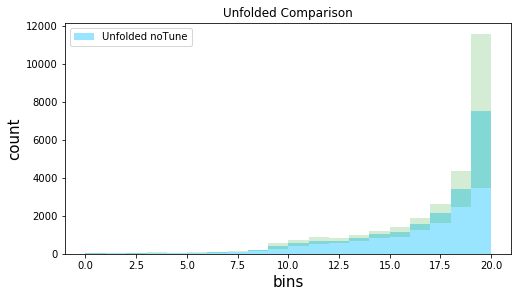

In [13]:
###############
###BOTH######
#############

nue_unf_fig = plt.figure(figsize=(8, 7))
nue_unf_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_unf_ax1 = plt.subplot(nue_unf_gs[0])


#bins = np.arange(-1, 1.2, 0.2)
#count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
bincenters = np.arange(0.5, 20.5, 1)
bin_size = [0.5]*20

#print(np.array(nuWro_events) - np.array(nuWro_errs))

#print(bincenters)
sel = nue_unf_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_events, alpha = 0.4, label="Unfolded noTune")  # , weights=xsec_ratio_events

errors = nue_unf_ax1.bar(bincenters, np.array(nuWro_errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(nuWro_events) - np.array(nuWro_errs)))


nue_unf_ax1.set_ylabel('count', fontsize=15)
nue_unf_ax1.set_xlabel('bins', fontsize=15)
nue_unf_ax1.set_title("Unfolded Comparison")
leg = nue_unf_ax1.legend()

#nue_unf_ax1.set_ylim([150, 1500])

In [14]:
ending = "Sept19_noTune"

nue_nuWro_true = pd.read_csv("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", header=None)

nue_nuWro_true = nue_nuWro_true.values[:, 0]
print(nue_nuWro_true)
print("")
#########################################

numu_nuWro_true = pd.read_csv("numu_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", header=None)

numu_nuWro_true = numu_nuWro_true.values[:, 0]
print(numu_nuWro_true)

[ 23.5441462   25.78954787  31.81621196  36.99776344  45.65726772
  59.37669155  79.28241903 114.95074767 192.75354321 469.72451509]

[  530.90767071   613.16020643   722.21230431   849.24502493
  1015.79888084  1269.10239869  1619.28102583  2327.51739946
  3800.97691347 10058.56654908]


In [15]:
#Get the true errs

#nue_nuWro_true_err = pd.read_csv("nue_prior_true_err_squared_angle_comb_"+ending+".csv", header=None)
nue_nuWro_true_err = pd.read_csv("nue_prior_true_err_genie_stat_only_angle_comb_"+ending+".csv", header=None)

nue_nuWro_true_err = nue_nuWro_true_err.values[:, 0]
print(nue_nuWro_true_err)
print("")
###############################

#numu_nuWro_true_err = pd.read_csv("numu_prior_true_err_squared_angle_comb_"+ending+".csv", header=None)
numu_nuWro_true_err = pd.read_csv("numu_prior_true_err_genie_stat_only_angle_comb_"+ending+".csv", header=None)


numu_nuWro_true_err = numu_nuWro_true_err.values[:, 0]
print(numu_nuWro_true_err)





[ 4.05052341  4.75364979  5.56628943  6.01561072  7.89739221  9.74047343
 12.00973822 17.4686725  25.08205166 43.66112058]

[102.67002067 116.76864201 131.56021748 152.57935314 171.66125321
 207.17104086 245.63090489 338.02112359 472.87615425 969.13050738]


In [16]:
nue_numu_tot_nuWro_true = np.concatenate((nue_nuWro_true, numu_nuWro_true), axis=0)

print(nue_numu_tot_nuWro_true)

##################################
print("")

nue_numu_tot_nuWro_true_err = np.concatenate((nue_nuWro_true_err, numu_nuWro_true_err), axis=0)

print(nue_numu_tot_nuWro_true_err)

[   23.5441462     25.78954787    31.81621196    36.99776344
    45.65726772    59.37669155    79.28241903   114.95074767
   192.75354321   469.72451509   530.90767071   613.16020643
   722.21230431   849.24502493  1015.79888084  1269.10239869
  1619.28102583  2327.51739946  3800.97691347 10058.56654908]

[  4.05052341   4.75364979   5.56628943   6.01561072   7.89739221
   9.74047343  12.00973822  17.4686725   25.08205166  43.66112058
 102.67002067 116.76864201 131.56021748 152.57935314 171.66125321
 207.17104086 245.63090489 338.02112359 472.87615425 969.13050738]


In [17]:
#Now smear it by Ac

smeared_nuWro = np.dot(nue_numu_tot_nuWro_true, nuWro_Ac)
#smeared_nuWro = np.dot(prior_true_nuWro, nuWro_Ac)
print("Prior_Truth x AC: ")
print(smeared_nuWro)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(nuWro_events)
print("")

diff = smeared_nuWro - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/smeared_nuWro)
print(diffasfrac*100)

Prior_Truth x AC: 
[  30.67389109   23.64010321   20.47303625   38.34935344   40.87608157
   59.93674779   69.22205843  100.71764486  178.42951178  443.05679727
  547.35574533  609.98197592  647.16200197  787.10623291  919.84627475
 1132.01680135 1542.55096464 2143.53579474 3542.57675903 8858.40840318]


Unfolding Done with MC Data Signal: 
[29.863, 24.4018, 21.1813, 39.5353, 40.1893, 62.3521, 67.8112, 100.209, 172.397, 408.377, 584.589, 688.179, 690.886, 816.63, 1016.78, 1130.54, 1561.84, 2133.82, 3419.86, 7507.81]


Difference
[ 8.10891093e-01 -7.61696785e-01 -7.08263754e-01 -1.18594656e+00
  6.86781570e-01 -2.41535221e+00  1.41085843e+00  5.08644862e-01
  6.03251178e+00  3.46797973e+01 -3.72332547e+01 -7.81970241e+01
 -4.37239980e+01 -2.95237671e+01 -9.69337252e+01  1.47680135e+00
 -1.92890354e+01  9.71579474e+00  1.22716759e+02  1.35059840e+03]

[  2.64358731  -3.22205355  -3.45949543  -3.09248124   1.6801551
  -4.02983529   2.03816307   0.50502061   3.38089351   7.82739312
  -6.80

In [18]:
smeared_nuWro_err = np.dot(nue_numu_tot_nuWro_true_err, nuWro_Ac)
#smeared_nuWro = np.dot(prior_true_nuWro, nuWro_Ac)
print("Err x AC: ")
print(smeared_nuWro_err)
print("")
print("")


Err x AC: 
[  4.93735952   4.25976885   3.58096017   6.26348625   6.5986344
  10.19499172  10.29754349  15.20815992  23.09181913  41.31007369
 103.0040782  117.01873471 113.87785308 136.99688837 161.74769255
 175.70966994 229.17774574 307.26789667 462.44400471 848.26811003]




unfolded =  [  29.863    24.4018   21.1813   39.5353   40.1893   62.3521   67.8112
  100.209   172.397   408.377   584.589   688.179   690.886   816.63
 1016.78   1130.54   1561.84   2133.82   3419.86   7507.81  ]
smeared =  [  30.67389109   23.64010321   20.47303625   38.34935344   40.87608157
   59.93674779   69.22205843  100.71764486  178.42951178  443.05679727
  547.35574533  609.98197592  647.16200197  787.10623291  919.84627475
 1132.01680135 1542.55096464 2143.53579474 3542.57675903 8858.40840318]


(0, 500)

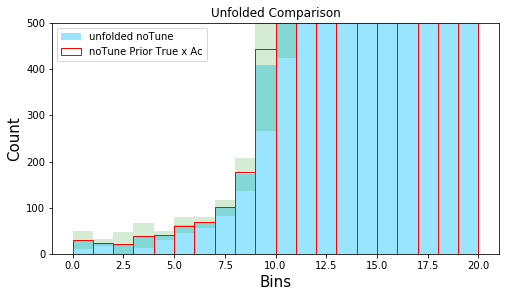

In [37]:
###############
###COMPARE######
#############

nue_unf_fig = plt.figure(figsize=(8, 7))
nue_unf_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_unf_ax1 = plt.subplot(nue_unf_gs[0])


#bins = np.arange(-1, 1.2, 0.2)
#count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
bincenters = np.arange(0.5, 20.5, 1)
bin_size = [0.5]*20

#print(np.array(nuWro_events) - np.array(nuWro_errs))

#print(bincenters)
f_obs = nue_unf_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_events, alpha = 0.4, label="unfolded noTune")  # , weights=xsec_ratio_events

errors = nue_unf_ax1.bar(bincenters, np.array(nuWro_errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(nuWro_events) - np.array(nuWro_errs)))

f_exp = nue_unf_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=smeared_nuWro, label='noTune Prior True x Ac')
#errors = nue_unf_ax1.bar(bincenters, np.array((nue_numu_tot_nuWro_true_err))*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(np.array(smeared_nuWro) - np.array((nue_numu_tot_nuWro_true_err))))
#errors = nue_unf_ax1.bar(bincenters, np.array((smeared_nuWro_err))*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(np.array(smeared_nuWro) - np.array((smeared_nuWro_err))))


print("unfolded = ", f_obs[0])
print("smeared = ", f_exp[0])

nue_unf_ax1.set_ylabel('Count', fontsize=15)
nue_unf_ax1.set_xlabel('Bins', fontsize=15)
nue_unf_ax1.set_title("Unfolded Comparison")
leg = nue_unf_ax1.legend()

nue_unf_ax1.set_ylim([0, 500])

#nue_unf_fig.savefig("unfolded_MC_noTune_output_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

In [20]:
np.savetxt("data_signal_MC_noTune_chi2_angleDiff_comb_"+ending+".csv", 
               nuWro_events,
               delimiter =", ", 
               fmt ='% s')

np.savetxt("prior_true_MC_noTune_chi2_angleDiff_comb_"+ending+".csv", 
               smeared_nuWro,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Sept19_noTune


In [21]:
start1 = np.array(smeared_nuWro) - np.array((nue_numu_tot_nuWro_true_err))
end1 = np.array(smeared_nuWro) + np.array((nue_numu_tot_nuWro_true_err))

start2 = np.array(nuWro_events) - np.array((nuWro_errs))
end2 = np.array(nuWro_events) + np.array((nuWro_errs))
#print(top)
#print(minus)

def overlap(start1, end1, start2, end2):
    """Does the range (start1, end1) overlap with (start2, end2)?"""
    return end1 >= start2 and end2 >= start1


for i in np.arange(len(smeared_nuWro)):
    print(overlap(start1[i], end1[i], start2[i], end2[i]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [22]:
for i in np.arange(len(smeared_nuWro)):
    print("bin = ", i)
    if( ((smeared_nuWro[i] < nuWro_events[i] + nuWro_errs[i]) and (smeared_nuWro[i] > nuWro_events[i] - nuWro_errs[i]))):# or ((nuWro_events[i] < smeared_nuWro[i] + nue_numu_tot_nuWro_true_err[i]) and (nuWro_events[i] > smeared_nuWro[i] - nue_numu_tot_nuWro_true_err[i])) ):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", smeared_nuWro[i])
        print("top of err = ", nuWro_events[i] + nuWro_errs[i])
        print("bot of err = ", nuWro_events[i] - nuWro_errs[i])
        print("")

bin =  0
Inside

bin =  1
Inside

bin =  2
Inside

bin =  3
Inside

bin =  4
Inside

bin =  5
Inside

bin =  6
Inside

bin =  7
Inside

bin =  8
Inside

bin =  9
Inside

bin =  10
Inside

bin =  11
Inside

bin =  12
Inside

bin =  13
Inside

bin =  14
Inside

bin =  15
Inside

bin =  16
Inside

bin =  17
Inside

bin =  18
Inside

bin =  19
Inside



In [23]:
###Do a chi squared test

import scipy.stats as sp

print(sum(f_obs[0]))
print(sum(f_exp[0]))

sp.chisquare(f_obs=f_obs[0], f_exp=f_exp[0])

20517.251
21735.916179488573


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.05939709854349264

In [24]:
f_obs = f_obs[0]
f_exp = f_exp[0]

In [25]:
hold = []

for i in range(len(f_obs)):
    braket = (f_obs[i] - f_exp[i])
    num = (braket*braket)/f_exp[i]
    hold.append(num)
    
print(sum(hold))
chi_squared_stat = sum(hold)

240.456837635049


In [26]:
####Crital value - what the chi sqaured value must be below for a P value fo this significance

deg_of_free = 19*19

sp.chi2.ppf(q = 0.95, df = deg_of_free)

406.30480132665537

In [27]:
p_value = 1 - sp.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=deg_of_free)
print("P value:",p_value)

P value: 0.9999998186811503


## Values from Steven's Code which takes uncertainty into account


chi2 =  0.738699

num_bins =  20

dof =  19

p_value =  1




In [35]:
deg_of_free = 19

sp.chi2.ppf(q = 0.5, df = deg_of_free)

18.337652896756474